In [6]:
import pandas as pd
import numpy as np
import math
import datetime as dt

In [2]:
br = pd.read_csv("bronx.csv")

In [3]:
br2 = br[['INCIDENT_DATETIME', 'INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE', 'FINAL_CALL_TYPE', 'FINAL_SEVERITY_LEVEL_CODE', 'FIRST_ASSIGNMENT_DATETIME', 'FIRST_ON_SCENE_DATETIME', 'BOROUGH', 'INCIDENT_DISPATCH_AREA', 'ZIPCODE']]
br2

,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,FIRST_ON_SCENE_DATETIME,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE
0,2018-12-31T23:57:04.000,CARDBR,2,CARDBR,2,2018-12-31T23:57:16.000,2018-12-31T23:57:37.000,BRONX,B3,10465.0
1,2018-12-31T23:55:27.000,INJURY,5,INJURY,5,2018-12-31T23:56:02.000,2019-01-01T00:04:46.000,BRONX,B2,10453.0
2,2018-12-31T23:51:39.000,SEIZR,3,SEIZR,3,2018-12-31T23:52:12.000,2019-01-01T00:00:58.000,BRONX,B1,10454.0
3,2018-12-31T23:51:00.000,MVAINJ,4,MVAINJ,4,2018-12-31T23:54:00.000,2019-01-01T00:07:36.000,BRONX,B1,10459.0
4,2018-12-31T23:50:38.000,EDP,7,EDPC,5,2018-12-31T23:58:53.000,2019-01-01T00:09:29.000,BRONX,B4,10467.0
5,2018-12-31T23:50:12.000,PEDSTR,3,PEDSTR,3,2018-12-31T23:51:48.000,2018-12-31T23:55:23.000,BRONX,B2,10456.0
6,2018-12-31T23:47:19.000,UNKNOW,4,UNKNOW,4,2018-12-31T23:58:36.000,2019-01-01T00:08:23.000,BRONX,B4,10469.0
7,2018-12-31T23:45:29.000,DRUG,4,DRUG,4,2018-12-31T23:48:50.000,2019-01-01T00:09:29.000,BRONX,B3,10462.0
8,2018-12-31T23:44:03.000,TRAUMA,2,TRAUMA,2,2018-12-31T23:44:39.000,2018-12-31T23:51:05.000,BRONX,B1,10456.0
9,2018-12-31T23:42:35.000,SICK,6,SICK,6,2018-12-31T23:43:07.000,2018-12-31T23:52:21.000,BRONX,B3,10461.0


## Location frequencies

In [22]:
zips_freq = {}

for index, row in br2.iterrows(): 
    if not math.isnan(row['ZIPCODE']): 
        if row['ZIPCODE'] not in zips_freq.keys():
            zips_freq[row['ZIPCODE']] = 1
        else:
            zips_freq[row['ZIPCODE']] += 1
        
zips_freq

{10465.0: 25091,
 10453.0: 84310,
 10454.0: 54986,
 10459.0: 66569,
 10467.0: 83557,
 10456.0: 113498,
 10469.0: 40893,
 10462.0: 51174,
 10461.0: 43219,
 10472.0: 55416,
 10458.0: 79041,
 10460.0: 68599,
 10452.0: 76125,
 10473.0: 48646,
 10466.0: 49407,
 10457.0: 95975,
 10463.0: 40465,
 10468.0: 65981,
 10474.0: 18703,
 10475.0: 28204,
 10455.0: 59792,
 10464.0: 3145,
 10451.0: 73573,
 10471.0: 11275,
 10470.0: 11787,
 10803.0: 47}

In [23]:
total_zips = 0
for k in zips_freq.keys():
    total_zips += zips_freq[k]

In [24]:
total_zips

1349478

In [25]:
zipcode_freq = {}
for k in zips_freq.keys():
    zipcode_freq[k] = zips_freq[k]/total_zips
    
zipcode_freq

{10465.0: 0.01859311526382794,
 10453.0: 0.06247600924209213,
 10454.0: 0.04074612553891208,
 10459.0: 0.049329444422213625,
 10467.0: 0.061918015706814045,
 10456.0: 0.08410511323637733,
 10469.0: 0.03030282820468359,
 10462.0: 0.03792132958077123,
 10461.0: 0.03202645763769398,
 10472.0: 0.041064767265564905,
 10458.0: 0.0585715365496881,
 10460.0: 0.05083372978292347,
 10452.0: 0.05641070102661918,
 10473.0: 0.03604801263896114,
 10466.0: 0.036611934392409506,
 10457.0: 0.07112009236163909,
 10463.0: 0.029985668532573336,
 10468.0: 0.04889372038669767,
 10474.0: 0.013859433054855284,
 10475.0: 0.02089993315934013,
 10455.0: 0.044307502604710856,
 10464.0: 0.002330530768193331,
 10451.0: 0.054519599430298236,
 10471.0: 0.008355082483745566,
 10470.0: 0.008734488446643813,
 10803.0: 3.482828175042498e-05}

In [26]:
total_zips = 0
for k in zipcode_freq.keys():
    total_zips += zipcode_freq[k]
total_zips

1.0

In [27]:
ambs = {10459: 4, 10458: 2, 11706: 38, 11223: 19, 10466: 1, 10461: 159, 10473: 169, 10465: 2}


In [28]:
ambs

{10459: 4,
 10458: 2,
 11706: 38,
 11223: 19,
 10466: 1,
 10461: 159,
 10473: 169,
 10465: 2}

In [29]:
import matplotlib.pyplot as plt

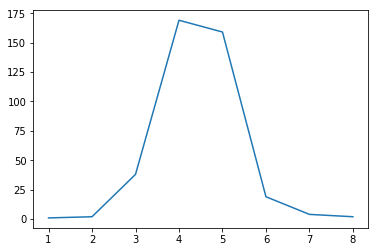

In [47]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [1, 2, 38, 169, 159, 19, 4, 2]

plt.plot(x, y)

In [48]:
from scipy.stats import norm
mean,std=norm.fit(y)

[1, 2, 38, 169, 159, 19, 4, 2]
49.25
67.3308064707382


/Users/samanthadaugherty/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


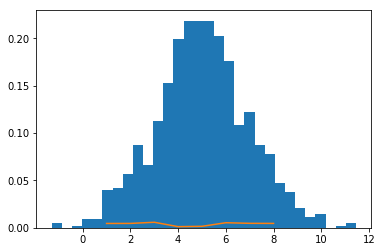

[1, 2, 3, 4, 5, 6, 7, 8]
[0.00458336 0.00463189 0.00584298 0.00121849 0.00156946 0.00535631
 0.00472737 0.00463189]


In [49]:
plt.hist(data, bins=30, normed=True)
xmin, xmax = plt.xlim()
print(y)
print(mean)
print(std)
y = norm.pdf(y, mean, std)
plt.plot(x, y)
plt.show()
print(x)
print(y)

In [43]:
print(mean)
print(std)
x

49.25
67.3308064707382


[1, 2, 3, 4, 5, 6, 7, 8]

In [39]:
y
np.mean(y)

49.25

In [50]:
zips = zipcode_freq.keys()
zips

dict_keys([10465.0, 10453.0, 10454.0, 10459.0, 10467.0, 10456.0, 10469.0, 10462.0, 10461.0, 10472.0, 10458.0, 10460.0, 10452.0, 10473.0, 10466.0, 10457.0, 10463.0, 10468.0, 10474.0, 10475.0, 10455.0, 10464.0, 10451.0, 10471.0, 10470.0, 10803.0])

In [51]:
dists_to_stations = {}
for k in zipcode_freq.keys():
    dists_to_stations[k] = []
    
dists_to_stations

{10465.0: [],
 10453.0: [],
 10454.0: [],
 10459.0: [],
 10467.0: [],
 10456.0: [],
 10469.0: [],
 10462.0: [],
 10461.0: [],
 10472.0: [],
 10458.0: [],
 10460.0: [],
 10452.0: [],
 10473.0: [],
 10466.0: [],
 10457.0: [],
 10463.0: [],
 10468.0: [],
 10474.0: [],
 10475.0: [],
 10455.0: [],
 10464.0: [],
 10451.0: [],
 10471.0: [],
 10470.0: [],
 10803.0: []}

#### based on google maps data

In [55]:
station1 = 10458
station2 = 10459
station3 = 10461
station4 = 10465
station5 = 10466
station6 = 10473

#0: 1028 Freeman Street, Bronx, NY 10459: 4
#1: 1624 Stillwell Ave, Bronx, NY 10461: 56
#2: 441 East Fordham Road, Bronx, NY 10458: 2
#3: 1028 Freeman Street, Bronx, NY 11706: 38
#4: 2593 West 13th St, Brooklyn, NY 11223 -> 1439 Ferris Pl, Bronx, NY 10461: 19
#5: 700 Havemeyer Avenue, Bronx, NY 10473: 1
#6: 111 East 210 Street, Bronx, NY 10466: 1
#7: 1624 Stillwell Avenue, Bronx, NY 10461: 103
#8: 700 Havermeyer Avenue, Bronx, NY 10473: 168
#9: 3955 E Tremont Ave, Bronx, NY, 10465: 2


dists_to_stations[10451.0] = [5.2, 9.5, 4.6, 2.6, 8.6, 7.9, 6.4, 9.5, 6.9, 7.9]
dists_to_stations[10452.0] = [4.0, 9.0, 3.2, 4.0, 5.7, 5.6, 7.3, 9.0, 5.6, 6.5]
dists_to_stations[10453.0] = [3.8, 8.8, 1.8, 3.8, 5.5, 5.3, 2.8, 8.8, 5.3, 6.3]
dists_to_stations[10454.0] = [2.5, 6.8, 5.8, 2.5, 5.9, 5.2, 7.4, 6.8, 5.2, 5.9]
dists_to_stations[10455.0] = [2.1, 7.0, 6.0, 2.1, 6.0, 5.4, 7.6, 7.0, 5.4, 6.1]
dists_to_stations[10456.0] = [2.2, 6.5, 2.7, 2.2, 5.3, 4.9, 6.6, 6.5, 5.1, 6.1]
dists_to_stations[10457.0] = [2.2, 7.2, 1.2, 2.2, 3.9, 3.8, 5.3, 7.2, 3.8, 4.7]
dists_to_stations[10458.0] = [4.3, 3.2, 0.3, 4.3, 3.8, 5.0, 2.2, 3.2, 5.0, 6.0]
dists_to_stations[10459.0] = [0.5, 5.4, 3.7, 0.5, 4.4, 3.9, 6.1, 5.4, 3.8, 4.5]
dists_to_stations[10460.0] = [1.4, 2.5, 1.4, 1.4, 2.2, 2.8, 3.2, 2.5, 2.8, 3.7]
dists_to_stations[10461.0] = [4.9, 1.3, 3.9, 4.9, 0.4, 2.2, 5.6, 1.3, 2.2, 2.1]
dists_to_stations[10462.0] = [2.3, 1.8, 2.4, 2.3, 1.2, 2.2, 4.2, 1.7, 2.2, 4.0]
dists_to_stations[10463.0] = [7.3, 5.3, 2.8, 9.7, 9.0, 8.2, 1.8, 5.3, 8.9, 9.8]
dists_to_stations[10464.0] = [8.7, 3.7, 6.2, 8.7, 4.6, 6.2, 8.0, 3.7, 6.2, 5.6]
dists_to_stations[10465.0] = [4.2, 3.0, 5.6, 4.2, 2.1, 1.5, 7.2, 3.0, 1.5, 0.9]
dists_to_stations[10466.0] = [6.7, 3.6, 5.0, 6.7, 4.6, 6.0, 3.3, 3.6, 6.0, 5.5]
dists_to_stations[10467.0] = [6.3, 4.0, 1.7, 4.9, 5.8, 5.7, 0.6, 4.0, 5.7, 6.6]
dists_to_stations[10468.0] = [4.9, 3.9, 1.2, 5.0, 4.5, 5.8, 1.5, 4.0, 5.8, 6.7]
dists_to_stations[10469.0] = [7.5, 1.5, 2.8, 7.5, 2.4, 4.9, 2.2, 2.5, 4.9, 4.4]
dists_to_stations[10470.0] = [6.5, 4.5, 4.8, 6.5, 6.1, 7.3, 3.1, 4.5, 7.3, 8.2]
dists_to_stations[10471.0] = [8.8, 13.0, 4.9, 8.4, 8.0, 9.2, 3.7, 7.4, 9.9, 11.0]
dists_to_stations[10472.0] = [1.5, 3.9, 3.2, 1.6, 3.0, 1.7, 5.1, 3.9, 1.7, 3.0]
dists_to_stations[10473.0] = [3.3, 4.2, 4.4, 3.3, 2.6, 1.2, 6.0, 4.2, 1.2, 3.3]
dists_to_stations[10474.0] = [2.2, 6.5, 5.9, 2.2, 5.5, 5.3, 7.5, 6.9, 5.3, 5.6]
dists_to_stations[10475.0] = [7.6, 2.6, 5.2, 7.6, 3.5, 4.9, 6.9, 2.6, 5.1, 4.4]
dists_to_stations[10803.0] = [8.5, 3.5, 6.0, 8.5, 4.4, 6.0, 7.8, 3.5, 6.0, 5.4]


In [56]:
{10459: 42,
 10458: 2,
 10466: 1,
 10461: 178,
 10473: 169,
 10465: 2}



station1 = 10458
station2 = 10459
station3 = 10461
station4 = 10465
station5 = 10466
station6 = 10473

dists_to_stations

{10465.0: [4.2, 3.0, 5.6, 4.2, 2.1, 1.5, 7.2, 3.0, 1.5, 0.9],
 10453.0: [3.8, 8.8, 1.8, 3.8, 5.5, 5.3, 2.8, 8.8, 5.3, 6.3],
 10454.0: [2.5, 6.8, 5.8, 2.5, 5.9, 5.2, 7.4, 6.8, 5.2, 5.9],
 10459.0: [0.5, 5.4, 3.7, 0.5, 4.4, 3.9, 6.1, 5.4, 3.8, 4.5],
 10467.0: [6.3, 4.0, 1.7, 4.9, 5.8, 5.7, 0.6, 4.0, 5.7, 6.6],
 10456.0: [2.2, 6.5, 2.7, 2.2, 5.3, 4.9, 6.6, 6.5, 5.1, 6.1],
 10469.0: [7.5, 1.5, 2.8, 7.5, 2.4, 4.9, 2.2, 2.5, 4.9, 4.4],
 10462.0: [2.3, 1.8, 2.4, 2.3, 1.2, 2.2, 4.2, 1.7, 2.2, 4.0],
 10461.0: [4.9, 1.3, 3.9, 4.9, 0.4, 2.2, 5.6, 1.3, 2.2, 2.1],
 10472.0: [1.5, 3.9, 3.2, 1.6, 3.0, 1.7, 5.1, 3.9, 1.7, 3.0],
 10458.0: [4.3, 3.2, 0.3, 4.3, 3.8, 5.0, 2.2, 3.2, 5.0, 6.0],
 10460.0: [1.4, 2.5, 1.4, 1.4, 2.2, 2.8, 3.2, 2.5, 2.8, 3.7],
 10452.0: [4.0, 9.0, 3.2, 4.0, 5.7, 5.6, 7.3, 9.0, 5.6, 6.5],
 10473.0: [3.3, 4.2, 4.4, 3.3, 2.6, 1.2, 6.0, 4.2, 1.2, 3.3],
 10466.0: [6.7, 3.6, 5.0, 6.7, 4.6, 6.0, 3.3, 3.6, 6.0, 5.5],
 10457.0: [2.2, 7.2, 1.2, 2.2, 3.9, 3.8, 5.3, 7.2, 3.8, 4.7],
 10463.0

In [4]:
br2

,INCIDENT_DATETIME,INITIAL_CALL_TYPE,INITIAL_SEVERITY_LEVEL_CODE,FINAL_CALL_TYPE,FINAL_SEVERITY_LEVEL_CODE,FIRST_ASSIGNMENT_DATETIME,FIRST_ON_SCENE_DATETIME,BOROUGH,INCIDENT_DISPATCH_AREA,ZIPCODE
0,2018-12-31T23:57:04.000,CARDBR,2,CARDBR,2,2018-12-31T23:57:16.000,2018-12-31T23:57:37.000,BRONX,B3,10465.0
1,2018-12-31T23:55:27.000,INJURY,5,INJURY,5,2018-12-31T23:56:02.000,2019-01-01T00:04:46.000,BRONX,B2,10453.0
2,2018-12-31T23:51:39.000,SEIZR,3,SEIZR,3,2018-12-31T23:52:12.000,2019-01-01T00:00:58.000,BRONX,B1,10454.0
3,2018-12-31T23:51:00.000,MVAINJ,4,MVAINJ,4,2018-12-31T23:54:00.000,2019-01-01T00:07:36.000,BRONX,B1,10459.0
4,2018-12-31T23:50:38.000,EDP,7,EDPC,5,2018-12-31T23:58:53.000,2019-01-01T00:09:29.000,BRONX,B4,10467.0
5,2018-12-31T23:50:12.000,PEDSTR,3,PEDSTR,3,2018-12-31T23:51:48.000,2018-12-31T23:55:23.000,BRONX,B2,10456.0
6,2018-12-31T23:47:19.000,UNKNOW,4,UNKNOW,4,2018-12-31T23:58:36.000,2019-01-01T00:08:23.000,BRONX,B4,10469.0
7,2018-12-31T23:45:29.000,DRUG,4,DRUG,4,2018-12-31T23:48:50.000,2019-01-01T00:09:29.000,BRONX,B3,10462.0
8,2018-12-31T23:44:03.000,TRAUMA,2,TRAUMA,2,2018-12-31T23:44:39.000,2018-12-31T23:51:05.000,BRONX,B1,10456.0
9,2018-12-31T23:42:35.000,SICK,6,SICK,6,2018-12-31T23:43:07.000,2018-12-31T23:52:21.000,BRONX,B3,10461.0
